1. Data Exploration and Visualization: Explore the “fundamentals.csv”. Include any other plots you find interesting

   Unnamed: 0 Ticker Symbol Period Ending  Accounts Payable  \
0           0           AAL    2012-12-31      3.068000e+09   
1           1           AAL    2013-12-31      4.975000e+09   
2           2           AAL    2014-12-31      4.668000e+09   
3           3           AAL    2015-12-31      5.102000e+09   
4           4           AAP    2012-12-29      2.409453e+09   

   Accounts Receivable  Add'l income/expense items  After Tax ROE  \
0         -222000000.0               -1.961000e+09           23.0   
1          -93000000.0               -2.723000e+09           67.0   
2         -160000000.0               -1.500000e+08          143.0   
3          352000000.0               -7.080000e+08          135.0   
4          -89482000.0                6.000000e+05           32.0   

   Capital Expenditures  Capital Surplus  Cash Ratio  ...  \
0         -1.888000e+09     4.695000e+09        53.0  ...   
1         -3.114000e+09     1.059200e+10        75.0  ...   
2         -5.311000e+09

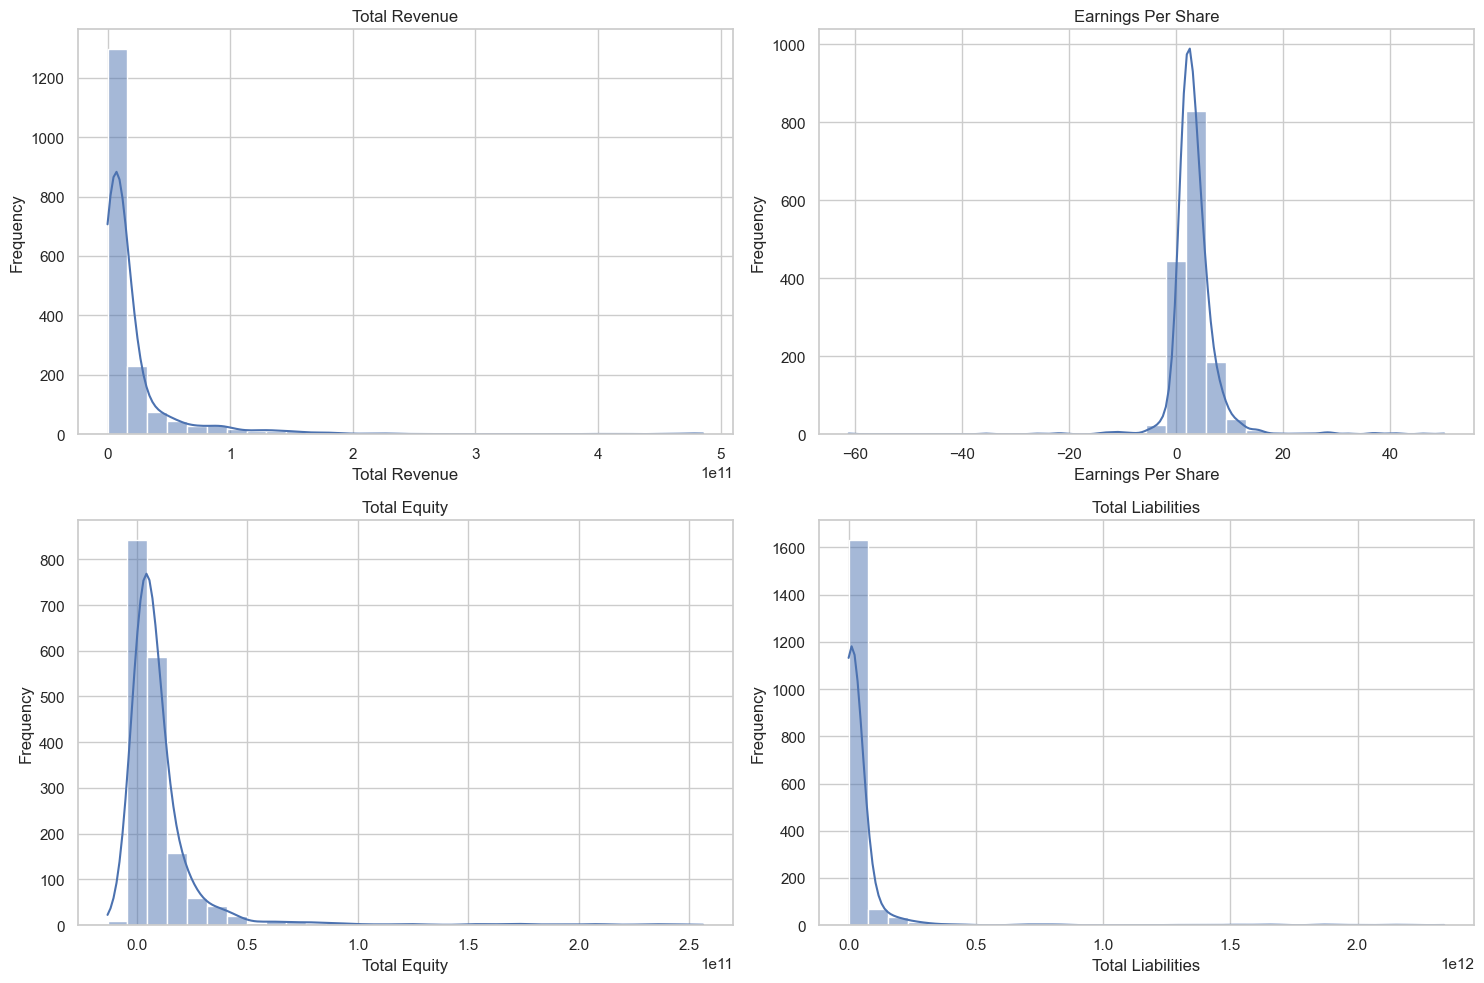

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file = 'fundamentals.csv'
file_df = pd.read_csv(file)

# Display the first few rows
print(file_df.head())

# Plot on White Grid
sns.set(style="whitegrid")

# Selecting a few financial indicators for visualization
key_metrics = ['Total Revenue', 'Earnings Per Share', 'Total Equity', 'Total Liabilities']

# Creating histograms for the selected metrics
plt.figure(figsize=(15, 10))

for i, metric in enumerate(key_metrics, 1):
    plt.subplot(2, 2, i)
    sns.histplot(file_df[metric].dropna(), bins=30, kde=True)
    plt.title(metric)
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


2. Linear Regression Model Development: Create linear regression to predict Estimated Shares Outstanding. Explain your model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dropping rows with missing 'Estimated Shares Outstanding'
file_df = file_df.dropna(subset=['Estimated Shares Outstanding'])

features = ['Total Revenue', 'Total Equity', 'Total Liabilities', 'Earnings Per Share']
X = file_df[features]
y = file_df['Estimated Shares Outstanding']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Development
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Displaying the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Coefficients: {model.coef_}")

Mean Squared Error: 3.9665975186049696e+17
R-squared: 0.4931642085810165
Coefficients: [ 1.41177282e-03  3.75310972e-02 -7.86554482e-04 -2.73562229e+07]
